### Задание 1 - по тетрадке sem01_autograd.

1. Добавить Bias и посчитать для них градиенты.
2. Сравнить градиенты с тем, как считает PyTorch AutoGrad.

In [1]:
import numpy as np
import torch

In [2]:
dtype = torch.float
device = torch.device("cpu")

In [3]:
batch_size = 64
input_size = 3
hidden_size = 2
output_size = 1

In [4]:
# Randomly initialize weights
w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype)
w2 = torch.randn(hidden_size, output_size, device=device, dtype=dtype)

# добавляем смещение
b1 = torch.randn(1, hidden_size, device=device, dtype=dtype)
b2 = torch.randn(1, output_size, device=device, dtype=dtype)

In [5]:
print('w1:', w1)
print('w2', w2)
print('b1', b1)
print('b2', b2)

w1: tensor([[-1.3915,  0.6679],
        [ 0.6208,  0.9856],
        [ 1.2371,  0.9057]])
w2 tensor([[-2.0442],
        [-0.2662]])
b1 tensor([[0.5062, 0.5967]])
b2 tensor([[0.3010]])


In [6]:
# сохраняю изначальные значения весов и смещений, чтобы потом их использовать с autograde
w1_initial = w1.clone().detach()
w2_initial = w2.clone().detach()
b1_initial = b1.clone().detach()
b2_initial = b2.clone().detach()

In [7]:
print(w1_initial, w2_initial, b1_initial, b2_initial, sep='\n')

tensor([[-1.3915,  0.6679],
        [ 0.6208,  0.9856],
        [ 1.2371,  0.9057]])
tensor([[-2.0442],
        [-0.2662]])
tensor([[0.5062, 0.5967]])
tensor([[0.3010]])


In [ ]:
# Create random input and output data
x = torch.randn(batch_size, input_size, device=device, dtype=dtype)
y = torch.randn(batch_size, output_size, device=device, dtype=dtype)

# # Randomly initialize weights
# w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype)
# w2 = torch.randn(hidden_size, output_size, device=device, dtype=dtype)

# # добавляем смещение
# b1 = torch.randn(1, hidden_size, device=device, dtype=dtype)
# b2 = torch.randn(1, output_size, device=device, dtype=dtype)


learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    #TODO
    h_1 = x.mm(w1) + b1 # первый скрытый слой со смещением
    h_relu = h_1.clamp(min=0) # релу
    out = h_relu.mm(w2) + b2 # выходной слой (y_pred) со смещением


    # Compute and print loss
    loss = (out - y).pow(2).sum().item() # mse
    
    # Backward pass: 
    dloss_out = 2 * (out - y) # производная функции потерь по out (y_pred)

    # градиенты для выходного слоя
    grad_w2 = h_relu.t().mm(dloss_out) # производная градиент по w2
    grad_b2 = dloss_out.sum(0) # суммируем градиенты по всем выходам


    # backprop — проход назал через релу
    grad_hrelu = dloss_out.mm(w2.t()) # градиент по релу
    grad_hrelu[h_1 < 0] = 0 # зануляем отрицательные значения после применения релу

    grad_w1 = x.t().mm(grad_hrelu)
    grad_b1 = grad_hrelu.sum(0)
    
    # обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    b1 -= learning_rate * grad_b1
    b2 -= learning_rate * grad_b2
    if t % 100 == 99:
        print(f'Loss on iteration {t} = {loss}')
        print(f'\tgrad_w2: {grad_w2}\n\tgrad_b2: {grad_b2}\n\tgrad_w1: {grad_w1}\n\tgrad_b1: {grad_b1}')
    

Loss on iteration 99 = 713.620849609375
	grad_w2: tensor([[-663.8812],
        [-277.0002]])
	grad_b2: tensor([-266.6156])
	grad_w1: tensor([[-511.7701,  -34.6045],
        [ 173.1483,   29.1886],
        [ 234.0929,   34.3338]])
	grad_b1: tensor([528.0421,  49.5813])
Loss on iteration 199 = 606.18505859375
	grad_w2: tensor([[-579.1856],
        [-249.2924]])
	grad_b2: tensor([-238.5721])
	grad_w1: tensor([[-451.8607,  -28.5698],
        [ 155.0873,   23.7129],
        [ 209.0592,   28.1171]])
	grad_b1: tensor([461.2806,  39.8104])
Loss on iteration 299 = 522.69970703125
	grad_w2: tensor([[-510.6060],
        [-225.9606]])
	grad_b2: tensor([-214.7376])
	grad_w1: tensor([[-402.8070,  -23.7106],
        [ 134.7094,   19.3847],
        [ 192.2968,   23.0805]])
	grad_b1: tensor([402.7561,  32.1053])
Loss on iteration 399 = 456.39990234375
	grad_w2: tensor([[-453.9970],
        [-205.8306]])
	grad_b2: tensor([-194.0590])
	grad_w1: tensor([[-362.1610,  -19.7364],
        [ 122.6883,   15.866

In [9]:
# autograde
w1 = w1_initial.clone().detach().requires_grad_(True)
w2 = w2_initial.clone().detach().requires_grad_(True)
b1 = b1_initial.clone().detach().requires_grad_(True)
b2 = b2_initial.clone().detach().requires_grad_(True)

In [10]:
print(w1, w2, b1, b2, sep='\n')

tensor([[-1.3915,  0.6679],
        [ 0.6208,  0.9856],
        [ 1.2371,  0.9057]], requires_grad=True)
tensor([[-2.0442],
        [-0.2662]], requires_grad=True)
tensor([[0.5062, 0.5967]], requires_grad=True)
tensor([[0.3010]], requires_grad=True)


In [11]:
learning_rate = 1e-6
for t in range(500):
    h = x.mm(w1) + b1
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2) + b2

    # y_pred = (x.mm(w1) + b1).clamp(min=0).mm(w2) + b2

    loss = (y_pred - y).pow(2).sum()
    
    loss.backward()

    if t % 100 == 99:
        print(t, loss.item())
        print(f'\tgrad_w2: {w2.grad}\n\tgrad_b2: {b2.grad}\n\tgrad_w1: {w1.grad}\n\tgrad_b1: {b1.grad}')

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        b1 -= learning_rate * b1.grad
        b2 -= learning_rate * b2.grad

        w1.grad.zero_()
        w2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()

99 713.620849609375
	grad_w2: tensor([[-663.8812],
        [-277.0002]])
	grad_b2: tensor([[-266.6156]])
	grad_w1: tensor([[-511.7701,  -34.6045],
        [ 173.1483,   29.1886],
        [ 234.0929,   34.3338]])
	grad_b1: tensor([[528.0421,  49.5813]])
199 606.18505859375
	grad_w2: tensor([[-579.1856],
        [-249.2924]])
	grad_b2: tensor([[-238.5721]])
	grad_w1: tensor([[-451.8607,  -28.5698],
        [ 155.0873,   23.7129],
        [ 209.0592,   28.1171]])
	grad_b1: tensor([[461.2806,  39.8104]])
299 522.69970703125
	grad_w2: tensor([[-510.6060],
        [-225.9606]])
	grad_b2: tensor([[-214.7376]])
	grad_w1: tensor([[-402.8070,  -23.7106],
        [ 134.7094,   19.3847],
        [ 192.2968,   23.0805]])
	grad_b1: tensor([[402.7561,  32.1053]])
399 456.39990234375
	grad_w2: tensor([[-453.9970],
        [-205.8306]])
	grad_b2: tensor([[-194.0590]])
	grad_w1: tensor([[-362.1610,  -19.7364],
        [ 122.6883,   15.8667],
        [ 174.2219,   18.9830]])
	grad_b1: tensor([[357.7068, 

autograd считает градиенты точно так же

### Задание 2. 

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка, и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv', index_col=0)
df.head()

x1        x2  y
0 -4.626272 -6.658988  0
1 -7.789640  0.262519  0
2 -8.739678  1.537758  0
3 -2.546441 -7.705224  0
4 -2.751506 -7.940187  0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   y       10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 312.5 KB


In [177]:
df.describe()

x1            x2             y
count  10000.000000  10000.000000  10000.000000
mean      -0.029488     -0.098799      0.509700
std        4.981907      5.022414      0.499931
min       -9.988732     -9.972095      0.000000
25%       -4.062951     -4.170403      0.000000
50%       -0.063085     -0.097836      1.000000
75%        4.016095      3.880448      1.000000
max        9.985560      9.982304      1.000000

In [178]:
df.isna().any()

x1    False
x2    False
y     False
dtype: bool

In [20]:
df.y.value_counts()

y
1    5097
0    4903
Name: count, dtype: int64

Как и в любой задаче машинного обучения, для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


<Axes: xlabel='x1', ylabel='x2'>

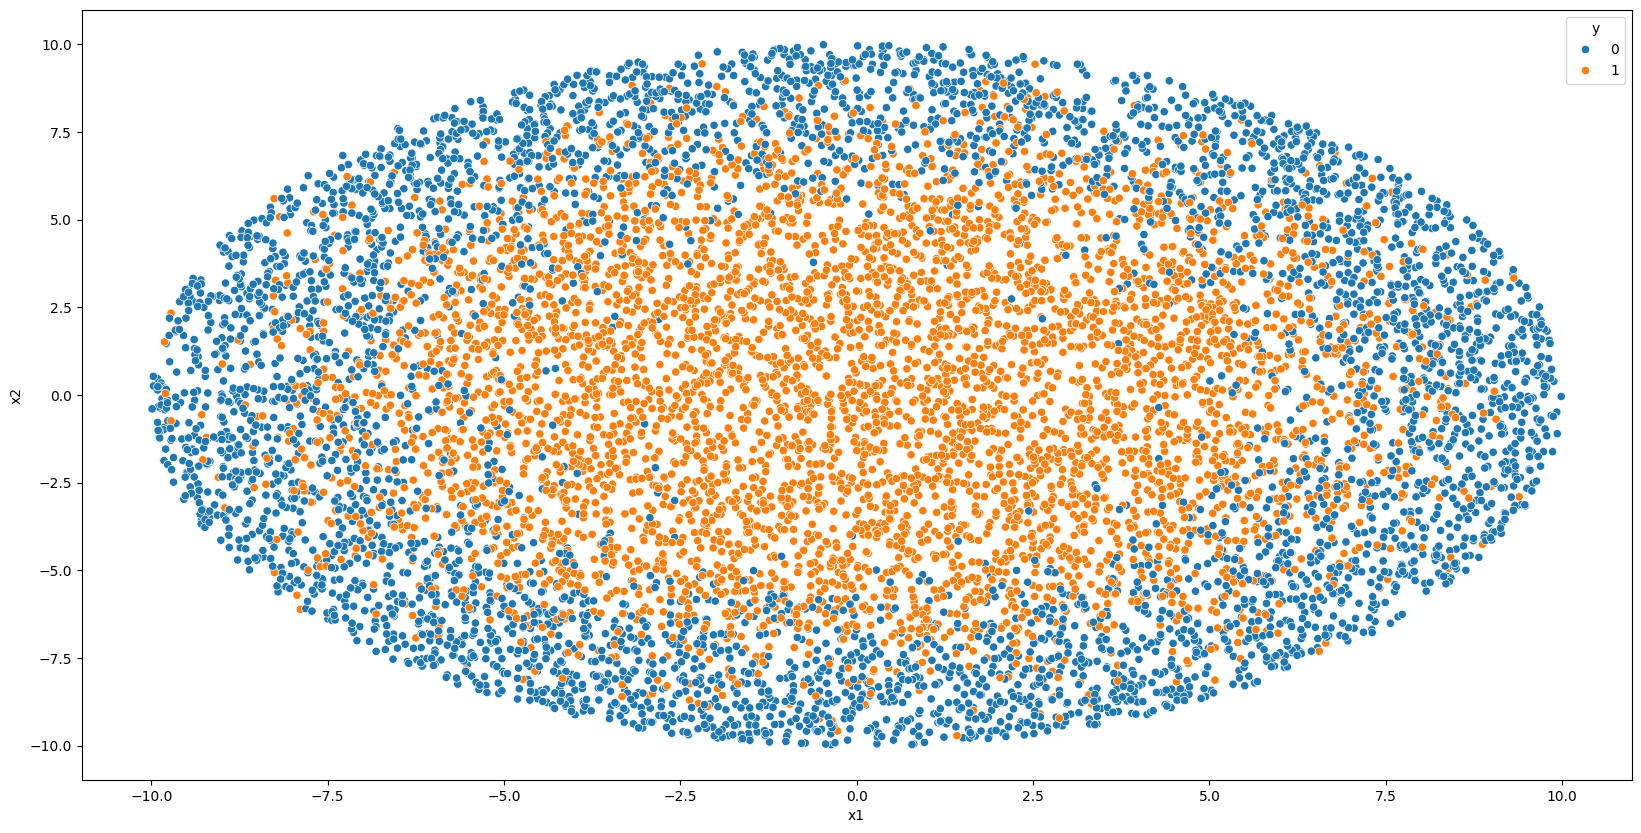

In [95]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data=df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

1. Идеальную вряд ли, поскольку границы между классами не очень точная (есть как бы наложение, я думаю, это в целом сложно детектировать точно), но думаю, что модели, решающие задачу нелинейной классификации, могут достаточно хорошо это решить

2. Ну в целом мы посмотрели основные характеристики: разброс значений (от -10 до 10, std), есть ли наны (нет), сбалансированы ли классы (да); визуализировали данные

3. Лог.регрессия, Decision Tree classifier, Random Forest, K-neighbors classifier, SVM (помню, была похожая выборка, мы тогда добавили размерность (третью координату), и выборка стала линейно раздилимой)

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трейн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size=0.33, random_state=42)

Точность нашей модели 0.5960606060606061


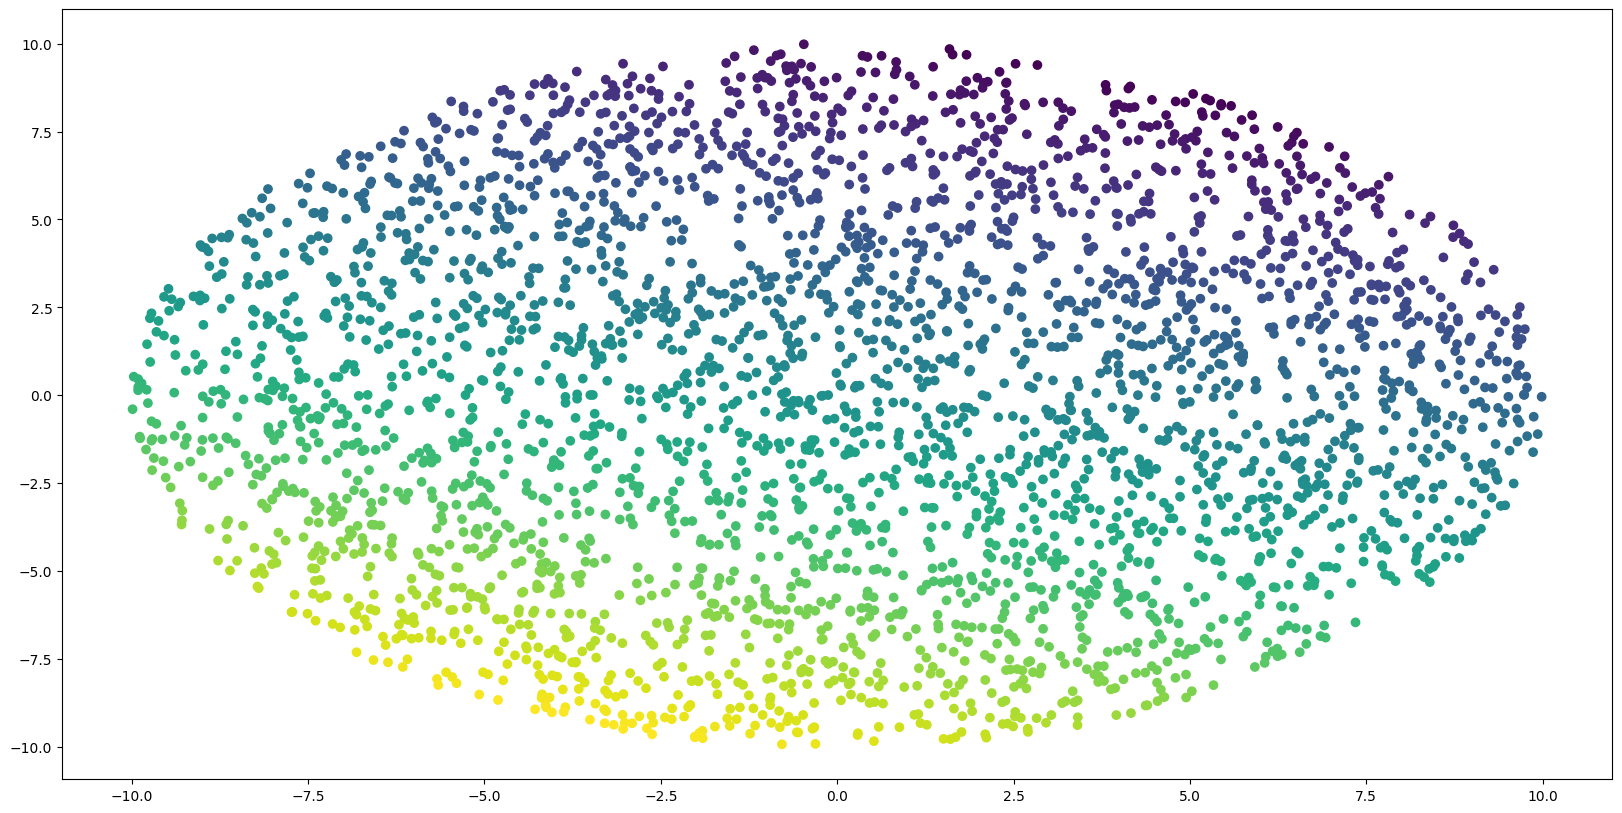

In [97]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

predict_logit = model.predict(X_test) # предсказываем классы
predict_log_proba = model.predict_proba(X_test) # предсказываем вероятности для каждого класса

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_log_proba[:, 0])
plt.show()

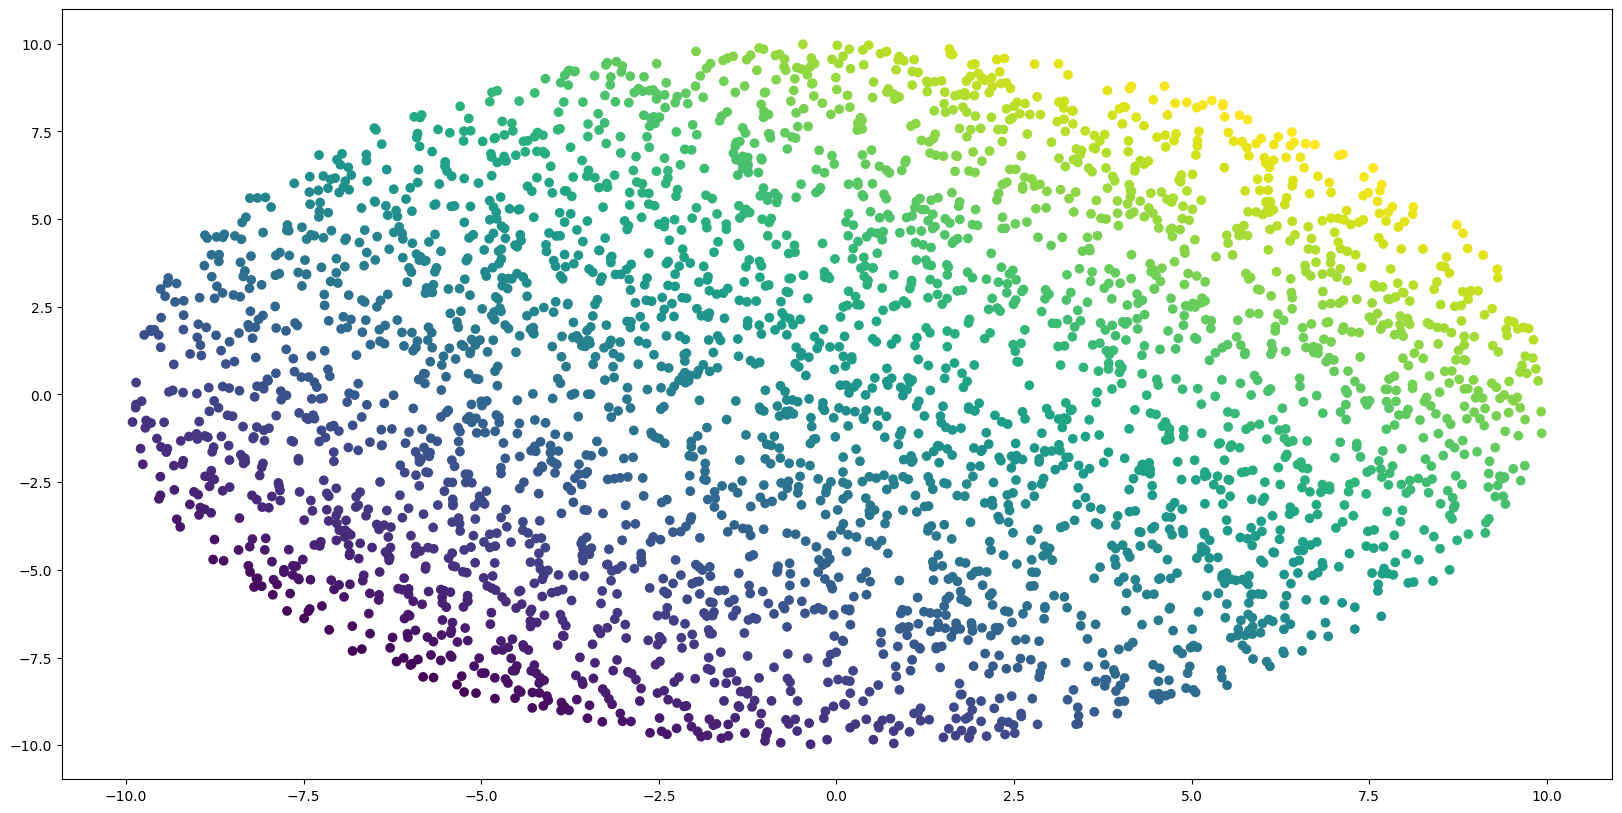

In [30]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_log_proba[:, 1])
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

In [171]:
df_new = df.copy()

Вот признаки, которые я попробовала добавить, выше всего точно оказалась с признаком центра окружности и произведением иксов:

In [172]:
# df_new['sum(x1, x2)'] = df_new.x1 + df_new.x2
# df_new['sub(x1, x2)'] = abs(df_new.x1 - df_new.x2)
df_new['mul(x1, x2)'] = df_new['x1'] * df_new['x2']
# df_new['x1 ^ 2'] = df_new['x1'] ** 2
# df_new['x2 ^ 2'] = df_new['x2'] ** 2
df_new['center'] = (df['x1'] ** 2 + df['x2'] ** 2) ** 0.5

In [173]:
df_new.head()

x1        x2  y  mul(x1, x2)    center
0 -4.626272 -6.658988  0    30.806291  8.108299
1 -7.789640  0.262519  0    -2.044926  7.794062
2 -8.739678  1.537758  0   -13.439505  8.873932
3 -2.546441 -7.705224  0    19.620902  8.115100
4 -2.751506 -7.940187  0    21.847474  8.403413

In [169]:
df_new.isna().sum()

x1        0
x2        0
y         0
x1 ^ 2    0
x2 ^ 2    0
center    0
dtype: int64

Точность нашей модели 0.8415151515151515


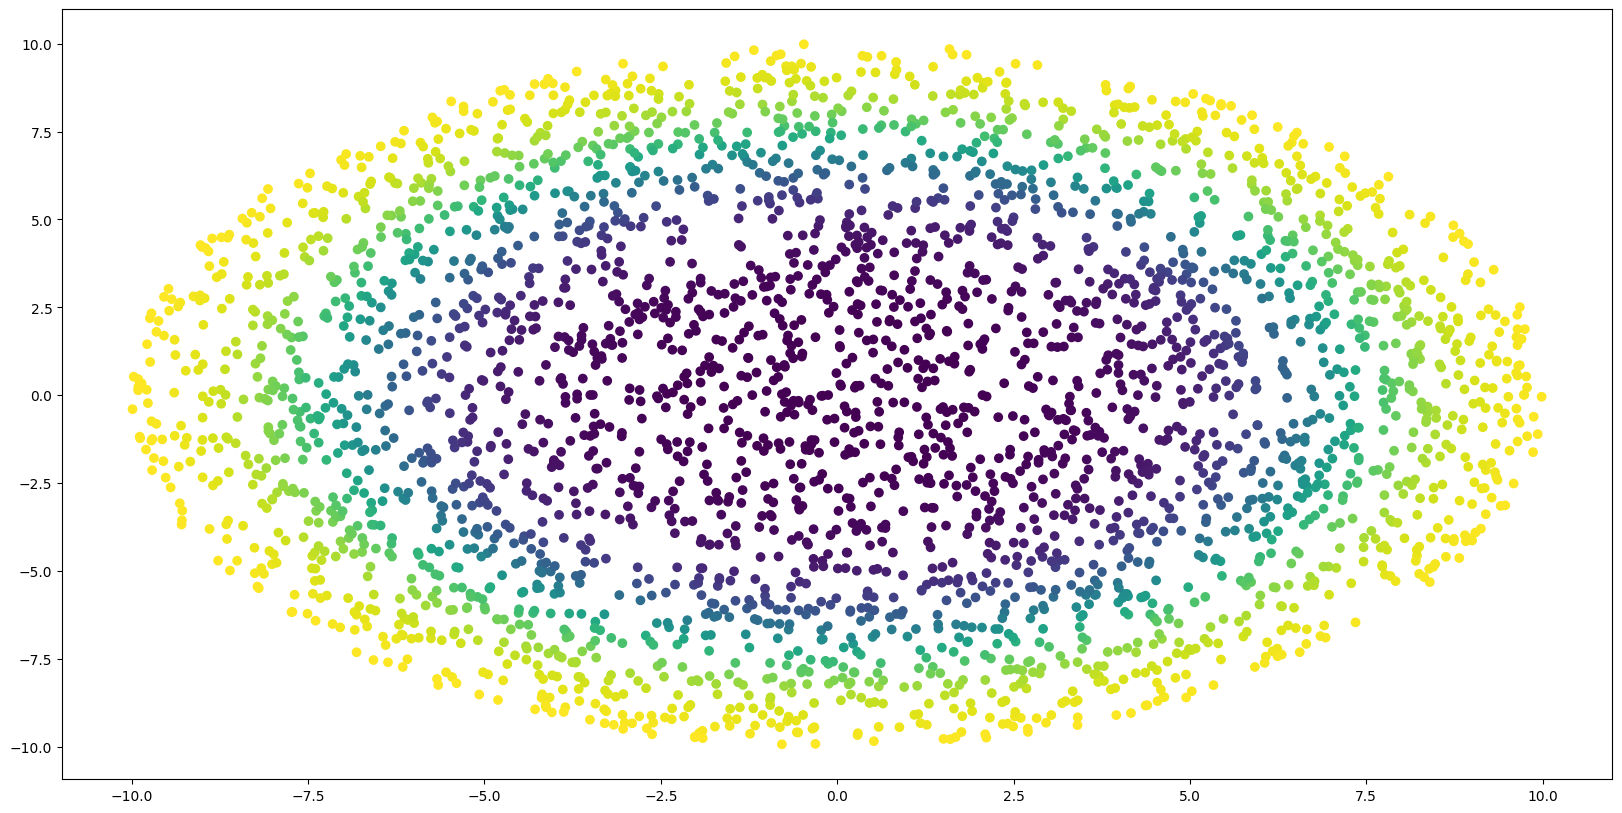

In [ ]:
# # Повторяем наш код, только с новыми фичами - смотрим на магию
# df_new = df.copy()

# #########################################
# # ваш код для фичей и новой модели

# df_new['new_feature_1'] = # ...

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'mul(x1, x2)', 'center']],
                                                                    df_new['y'], test_size=0.33, random_state=42)

model.fit(X_train_new, y_train_new)
predict_logit = model.predict(X_test_new) # предсказываем классы
predict_log_proba = model.predict_proba(X_test_new)

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit, y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c=predict_log_proba[:, 0])
plt.show() # красота!!!

Переходим к следующему классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

- деревья могут легко переобучиться, нужно зафиксировать глубину дерева и количество листьев

Точность нашей модели 0.8242424242424242


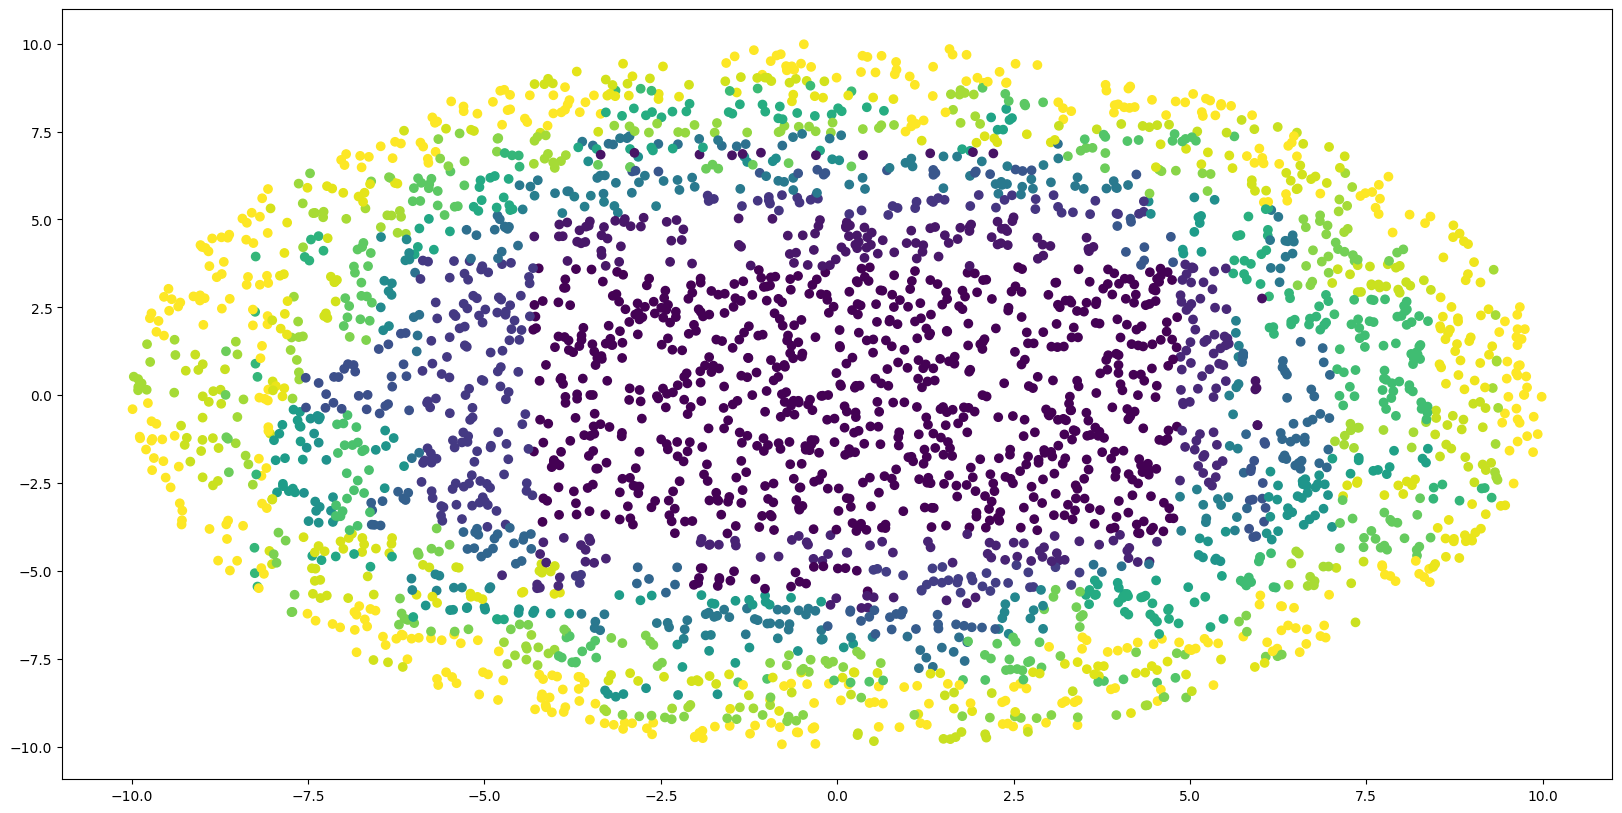

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#########################################
model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, random_state=42)
model.fit(X_train, y_train)

predict_tree = model.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = model.predict_proba(X_test)

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_tree_proba[:, 0])
plt.show() # получилось похуже...

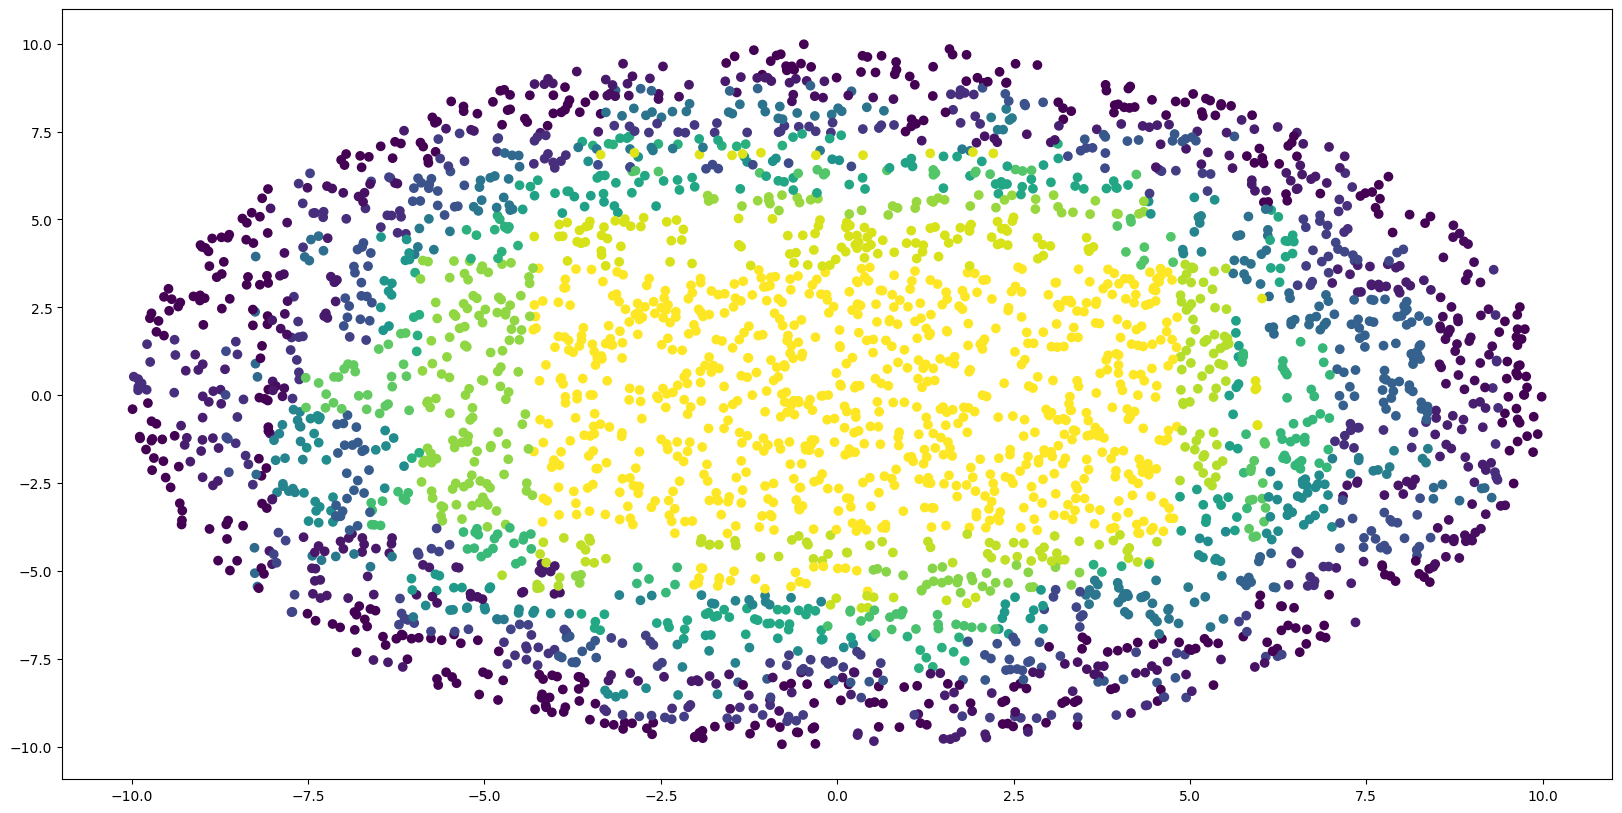

In [191]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_tree_proba[:, 1])
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Точность нашей модели 0.8360606060606061


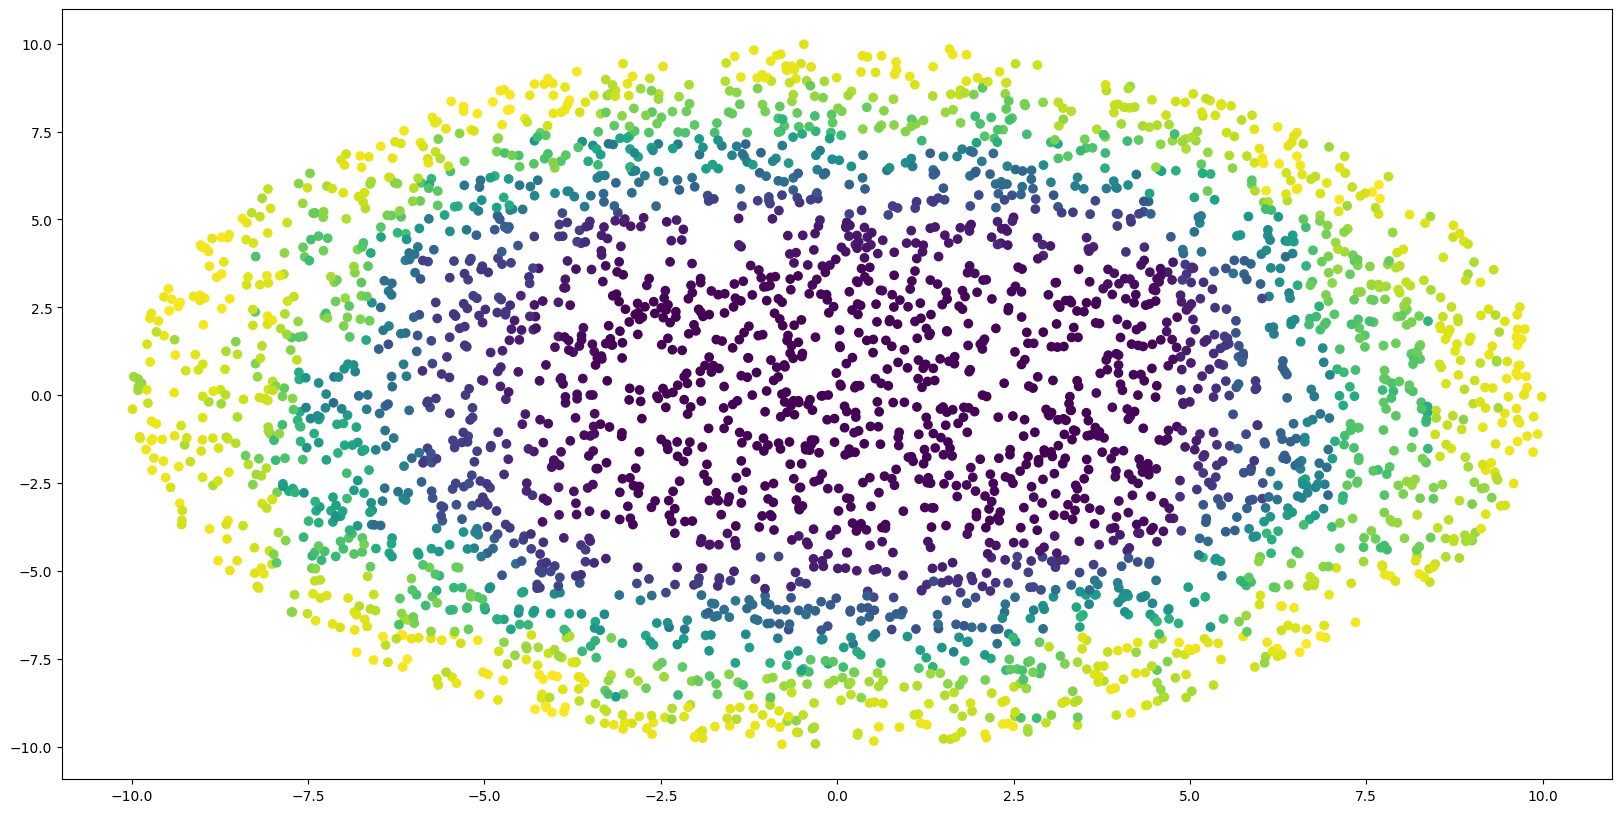

In [200]:
from sklearn.ensemble import RandomForestClassifier

#########################################
model = RandomForestClassifier(n_estimators=50, min_samples_leaf=3, min_samples_split=5, max_depth=10, random_state=42)
model.fit(X_train, y_train)

predict_forest = model.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = model.predict_proba(X_test)

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_forest_proba[:, 0])
plt.show()

- чуть-чуть стало лучше, чем предыдущая модель, но не то чтобы сильно...
- ансамбли хорошо работают с объемными данными и многоразмерностью

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. 

In [5]:
import torch
import torch.nn.functional as F
from torch import nn
import torch.optim as optim
import torch.utils.data as data_utils
from torchmetrics import Accuracy

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трейн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size=0.33, random_state=42)

In [6]:
def create_data_loader(X_train, y_train, X_test, y_test):
    train_tensor = data_utils.TensorDataset(torch.tensor(X_train.astype(np.float32)), torch.tensor(y_train))
    train_loader = data_utils.DataLoader(dataset=train_tensor,
                                         batch_size=64,
                                         shuffle=True)

    test_tensor = data_utils.TensorDataset(torch.tensor(X_test.astype(np.float32)), torch.tensor(y_test))
    test_loader = data_utils.DataLoader(dataset=test_tensor,
                                        batch_size=64,
                                        shuffle=False)
    return train_loader, test_loader

train_loader, test_loader = create_data_loader(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()) 

In [15]:
batch = next(iter(train_loader))
batch

[tensor([[-9.4196, -1.5463],
         [-2.0361, -4.3615],
         [-1.2254,  6.4679],
         [-1.6433, -6.1569],
         [ 0.8145, -3.0782],
         [-8.9720, -0.7730],
         [ 5.0724,  1.5774],
         [-3.8514,  5.7060],
         [-3.1118,  8.3421],
         [ 7.6847,  6.1148],
         [ 8.7120, -3.0445],
         [-1.2051, -3.1949],
         [-8.7340, -0.9853],
         [-5.9904, -4.0262],
         [-6.8562, -4.5861],
         [ 4.0421,  7.1313],
         [ 3.2250, -6.9229],
         [ 2.7729, -1.0452],
         [-1.7677, -1.1722],
         [ 9.5696, -2.7373],
         [ 5.5026, -7.6448],
         [-1.2317,  3.5123],
         [ 0.9329, -6.6305],
         [-7.0414,  3.3015],
         [ 7.7700,  2.0200],
         [ 1.7999,  3.4435],
         [ 4.8898, -1.2043],
         [-5.5159, -1.7239],
         [ 8.9703,  0.4157],
         [-3.5564, -3.5673],
         [ 1.4724,  0.6846],
         [-8.9867, -2.8569],
         [ 2.8974, -4.9855],
         [-1.5296, -3.9158],
         [ 7.3

#### Попытка 1

In [7]:
input_size = 2
hidden_size = 5 # кол-во нейронов
output_size = 1
learning_rate = 1e-6
epochs = 100

In [8]:
model = nn.Sequential(
    nn.Linear(in_features=input_size, out_features=hidden_size),  # линейный слой
    nn.ReLU(),                                                    # нелинейный
    nn.Linear(in_features=hidden_size, out_features=output_size), # линейный слой
    nn.Sigmoid()                                                  # функция активации
)

In [8]:
[x for x in model.named_parameters()] 

[('0.weight',
  Parameter containing:
  tensor([[ 0.1546, -0.6471],
          [-0.0885, -0.0191],
          [ 0.6287, -0.6518],
          [-0.4586,  0.1751],
          [ 0.2204, -0.6868]], requires_grad=True)),
 ('0.bias',
  Parameter containing:
  tensor([-0.0485,  0.4440, -0.1634, -0.6366,  0.3690], requires_grad=True)),
 ('2.weight',
  Parameter containing:
  tensor([[ 0.3503,  0.2883, -0.2551,  0.1459,  0.3261]], requires_grad=True)),
 ('2.bias',
  Parameter containing:
  tensor([-0.0202], requires_grad=True))]

In [9]:
criterion = nn.BCELoss() # для бинарной классификации
accuracy = Accuracy(task='multiclass', num_classes=2)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
train_loss_values = []
train_accuracy_values = []
valid_loss_values = []
valid_accuracy = []

def run_train():
    step = 0
    for epoch in range(epochs):
        running_loss = []
        running_acc = []
        for features, label in train_loader:        # X_train, y_train
            # Reset gradients

            output = model(features).squeeze(-1)    # y_pred = model(X_train)
                                                    #ValueError: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated

            # Calculate error and backpropagate
            label = label.float()                   # RuntimeError: Found dtype Long but expected Float
            loss = criterion(output, label)         # функция потерь
            loss.backward()
            acc = accuracy(output.round(), label.int()).item()

            # Update weights with gradients
            optimizer.step()
            optimizer.zero_grad()

            running_loss.append(loss.item())
            running_acc.append(acc)

            step += 1

        train_loss_values.append(np.mean(running_loss))
        train_accuracy_values.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print(f'EPOCH {epoch}: train_loss: {train_loss_values[-1]}')# train_accuracy_values[-1]))


        # Run validation
        running_loss = []
        running_acc = []
        for features, label in test_loader:
            output = model(features).squeeze(-1)
            # Calculate error and backpropagate
            label = label.float()
            loss = criterion(output, label)
            acc = accuracy(output.round(), label.int()).item()

            running_loss.append(loss.item())
            running_acc.append(acc)

        valid_loss_values.append(np.mean(running_loss))
        valid_accuracy.append(np.mean(running_acc))
        if epoch % 10 == 0:
            print(f'EPOCH {epoch}: valid_loss: {valid_loss_values[-1]}, valid_accuracy: {valid_accuracy[-1]}')
        
    return train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy

In [11]:
train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy = run_train()

EPOCH 0: train_loss: 0.7518322524570283
EPOCH 0: valid_loss: 0.7449097747986133, valid_accuracy: 0.5706129807692307
EPOCH 10: valid_loss: 0.7441961203630154, valid_accuracy: 0.5706129807692307
EPOCH 20: train_loss: 0.7500018432026818
EPOCH 20: valid_loss: 0.7434860513760493, valid_accuracy: 0.5700120192307693
EPOCH 30: valid_loss: 0.7427801581529471, valid_accuracy: 0.5706129807692307
EPOCH 40: train_loss: 0.7484320345379057
EPOCH 40: valid_loss: 0.742078382235307, valid_accuracy: 0.5706129807692307
EPOCH 50: valid_loss: 0.7413802788807795, valid_accuracy: 0.5709134615384616
EPOCH 60: train_loss: 0.7469779150826591
EPOCH 60: valid_loss: 0.7406867776925747, valid_accuracy: 0.5715144230769231
EPOCH 70: valid_loss: 0.7399964584754064, valid_accuracy: 0.5721153846153846
EPOCH 80: train_loss: 0.745428018342881
EPOCH 80: valid_loss: 0.7393102313463504, valid_accuracy: 0.5727163461538461
EPOCH 90: valid_loss: 0.7386276607330029, valid_accuracy: 0.5721153846153846


In [12]:
with torch.no_grad():
    test_scores = model(torch.tensor(X_test.to_numpy().astype(np.float32)))

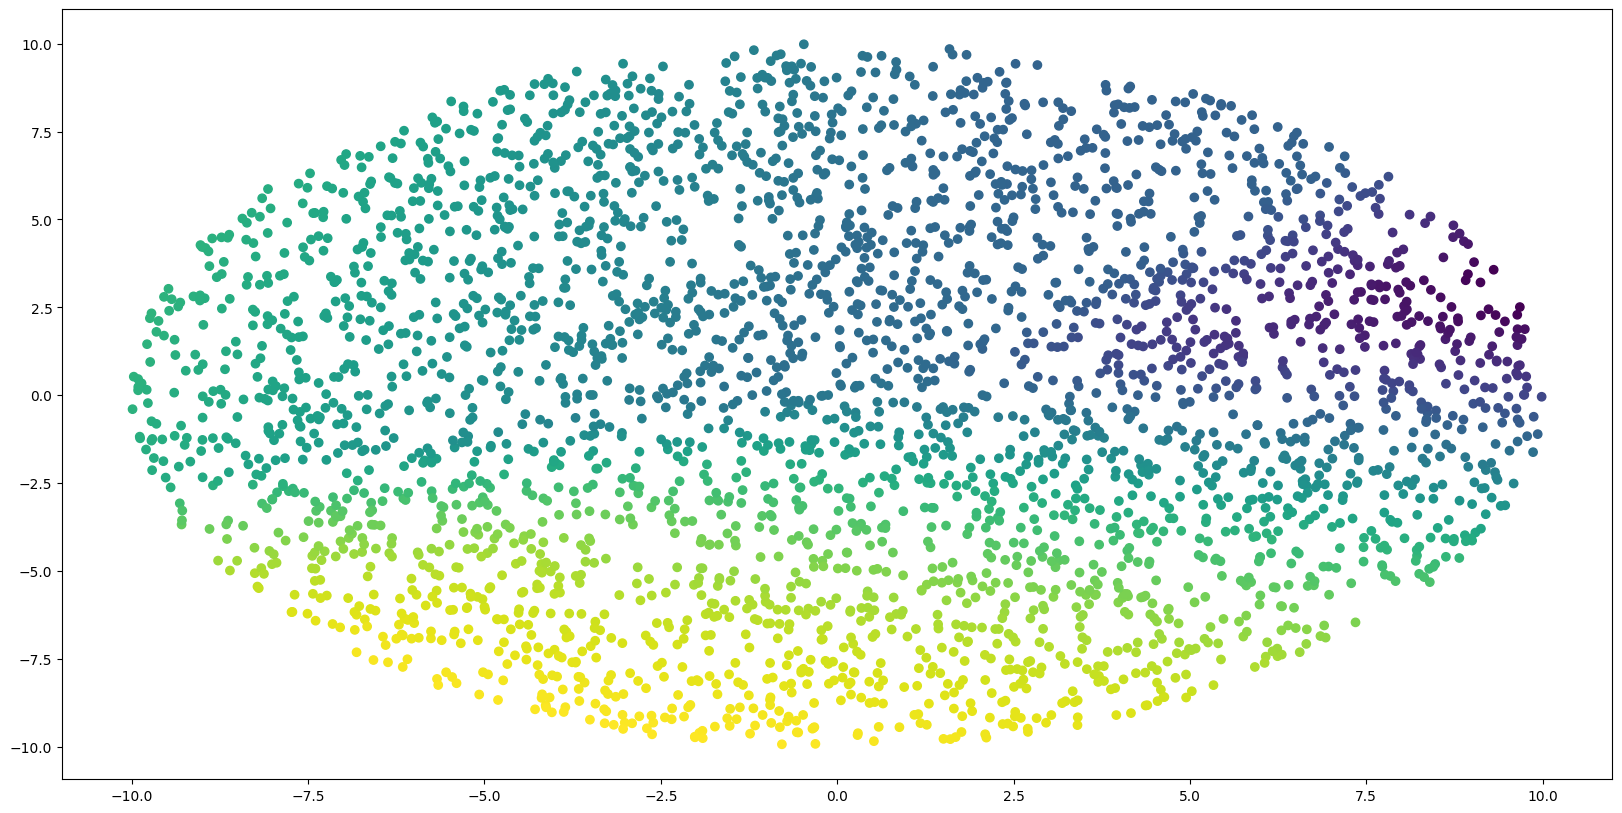

In [13]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=test_scores)
plt.show()

Тьма и мрак... Попробую поменять параметры (learning_rate уж слишком крошечный)

#### Попытка 2

In [16]:
input_size = 2
hidden_size = 5 # кол-во нейронов
output_size = 1
learning_rate = 1e-2
epochs = 100

In [17]:
model = nn.Sequential(
    nn.Linear(in_features=input_size, out_features=hidden_size),  # линейный слой
    nn.ReLU(),                                                    # нелинейный
    nn.Linear(in_features=hidden_size, out_features=output_size), # линейный слой
    nn.Sigmoid()                                                  # функция активации
)

In [18]:
criterion = nn.BCELoss() # для бинарной классификации
accuracy = Accuracy(task='multiclass', num_classes=2)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
train_loss_values = []
train_accuracy_values = []
valid_loss_values = []
valid_accuracy = []

def run_train():
    step = 0
    for epoch in range(epochs):
        running_loss = []
        running_acc = []
        for features, label in train_loader:        # X_train, y_train
            # Reset gradients

            output = model(features).squeeze(-1)    # y_pred = model(X_train)
                                                    #ValueError: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated

            # Calculate error and backpropagate
            label = label.float()                   # RuntimeError: Found dtype Long but expected Float
            loss = criterion(output, label)         # функция потерь
            loss.backward()
            acc = accuracy(output.round(), label.int()).item()

            # Update weights with gradients
            optimizer.step()
            optimizer.zero_grad()

            running_loss.append(loss.item())
            running_acc.append(acc)

            step += 1

        train_loss_values.append(np.mean(running_loss))
        train_accuracy_values.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print(f'EPOCH {epoch}: train_loss: {train_loss_values[-1]}')# train_accuracy_values[-1]))


        # Run validation
        running_loss = []
        running_acc = []
        for features, label in test_loader:
            output = model(features).squeeze(-1)
            # Calculate error and backpropagate
            label = label.float()
            loss = criterion(output, label)
            acc = accuracy(output.round(), label.int()).item()

            running_loss.append(loss.item())
            running_acc.append(acc)

        valid_loss_values.append(np.mean(running_loss))
        valid_accuracy.append(np.mean(running_acc))
        if epoch % 10 == 0:
            print(f'EPOCH {epoch}: valid_loss: {valid_loss_values[-1]}, valid_accuracy: {valid_accuracy[-1]}')
        
    return train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy

In [20]:
train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy = run_train()

EPOCH 0: train_loss: 0.65927228530248
EPOCH 0: valid_loss: 0.6496290140427076, valid_accuracy: 0.6237646902983005
EPOCH 10: valid_loss: 0.5503227298076336, valid_accuracy: 0.7677951386341682
EPOCH 20: train_loss: 0.492438660916828
EPOCH 20: valid_loss: 0.4954478442668915, valid_accuracy: 0.7959735576923077
EPOCH 30: valid_loss: 0.45887296474896944, valid_accuracy: 0.8186765496547406
EPOCH 40: train_loss: 0.43346644441286725
EPOCH 40: valid_loss: 0.43652999286468214, valid_accuracy: 0.824686165039356
EPOCH 50: valid_loss: 0.42117185489489484, valid_accuracy: 0.8264222752589446
EPOCH 60: train_loss: 0.4076152165730794
EPOCH 60: valid_loss: 0.4116155253006862, valid_accuracy: 0.8255876073470483
EPOCH 70: valid_loss: 0.4038939584906285, valid_accuracy: 0.8297275637204831
EPOCH 80: train_loss: 0.39446327033497036
EPOCH 80: valid_loss: 0.398338689827002, valid_accuracy: 0.8303285252589446
EPOCH 90: valid_loss: 0.3946911790049993, valid_accuracy: 0.8321314098743292


In [27]:
with torch.no_grad():
    test_scores = model(torch.tensor(X_test.to_numpy().astype(np.float32)))

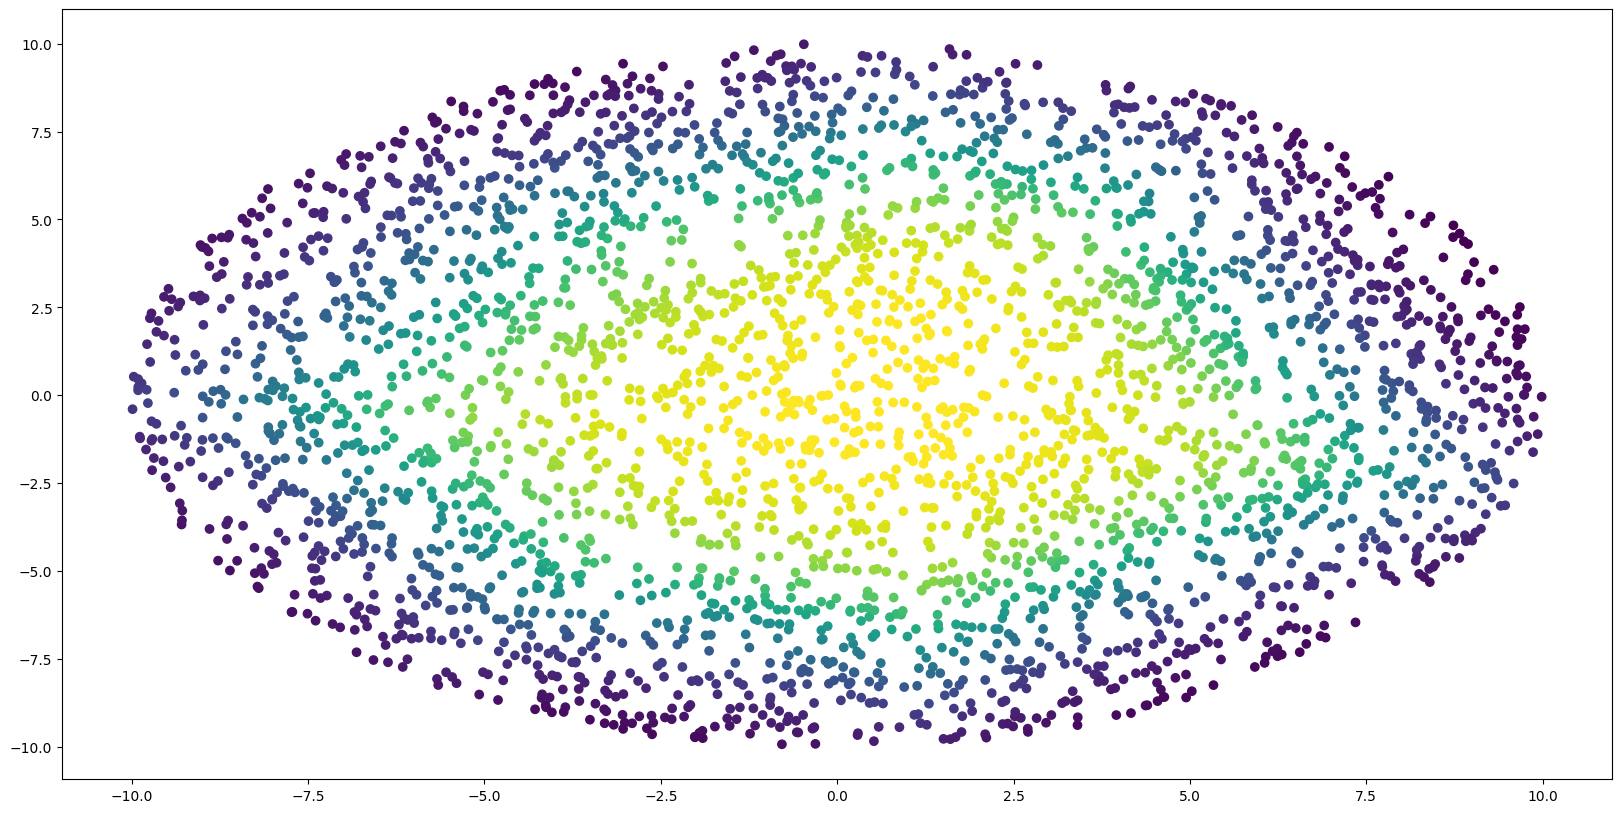

In [28]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=test_scores)
plt.show()

Картинка неплохая, точность немного ниже, чем у RandomForest. Попробуем взять другой оптимизатор

#### Попытка 3

In [36]:
input_size = 2
hidden_size = 5 # кол-во нейронов
output_size = 1
learning_rate = 1e-2
epochs = 100

In [37]:
model = nn.Sequential(
    nn.Linear(in_features=input_size, out_features=hidden_size),  # линейный слой
    nn.ReLU(),                                                    # нелинейный
    nn.Linear(in_features=hidden_size, out_features=output_size), # линейный слой
    nn.Sigmoid()                                                  # функция активации
)

In [ ]:
criterion = nn.BCELoss() # для бинарной классификации
accuracy = Accuracy(task='multiclass', num_classes=2)
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [39]:
train_loss_values = []
train_accuracy_values = []
valid_loss_values = []
valid_accuracy = []

def run_train():
    step = 0
    for epoch in range(epochs):
        running_loss = []
        running_acc = []
        for features, label in train_loader:        # X_train, y_train
            # Reset gradients

            output = model(features).squeeze(-1)    # y_pred = model(X_train)
                                                    #ValueError: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated

            # Calculate error and backpropagate
            label = label.float()                   # RuntimeError: Found dtype Long but expected Float
            loss = criterion(output, label)         # функция потерь
            loss.backward()
            acc = accuracy(output.round(), label.int()).item()

            # Update weights with gradients
            optimizer.step()
            optimizer.zero_grad()

            running_loss.append(loss.item())
            running_acc.append(acc)

            step += 1

        train_loss_values.append(np.mean(running_loss))
        train_accuracy_values.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print(f'EPOCH {epoch}: train_loss: {train_loss_values[-1]}')# train_accuracy_values[-1]))


        # Run validation
        running_loss = []
        running_acc = []
        for features, label in test_loader:
            output = model(features).squeeze(-1)
            # Calculate error and backpropagate
            label = label.float()
            loss = criterion(output, label)
            acc = accuracy(output.round(), label.int()).item()

            running_loss.append(loss.item())
            running_acc.append(acc)

        valid_loss_values.append(np.mean(running_loss))
        valid_accuracy.append(np.mean(running_acc))
        if epoch % 10 == 0:
            print(f'EPOCH {epoch}: valid_loss: {valid_loss_values[-1]}, valid_accuracy: {valid_accuracy[-1]}')
        
    return train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy

In [40]:
train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy = run_train()

EPOCH 0: train_loss: 0.6323649009068807
EPOCH 0: valid_loss: 0.5715395372647506, valid_accuracy: 0.6898370729042933
EPOCH 10: valid_loss: 0.3828132456311813, valid_accuracy: 0.8357371791050985
EPOCH 20: train_loss: 0.374910118324416
EPOCH 20: valid_loss: 0.3754486177976315, valid_accuracy: 0.8325988249136851
EPOCH 30: valid_loss: 0.38374064518855167, valid_accuracy: 0.8345352560281754
EPOCH 40: train_loss: 0.3717628708907536
EPOCH 40: valid_loss: 0.3798515424132347, valid_accuracy: 0.8304286862795169
EPOCH 50: valid_loss: 0.379962390431991, valid_accuracy: 0.8316973826059928
EPOCH 60: train_loss: 0.3716563236145746
EPOCH 60: valid_loss: 0.3763949922644175, valid_accuracy: 0.8317641558555456
EPOCH 70: valid_loss: 0.3872195321779985, valid_accuracy: 0.8247529382889087
EPOCH 80: train_loss: 0.3711888360125678
EPOCH 80: valid_loss: 0.3831319212913513, valid_accuracy: 0.8309294867974061
EPOCH 90: valid_loss: 0.38964782425990474, valid_accuracy: 0.8355034727316636


In [41]:
with torch.no_grad():
    test_scores = model(torch.tensor(X_test.to_numpy().astype(np.float32)))

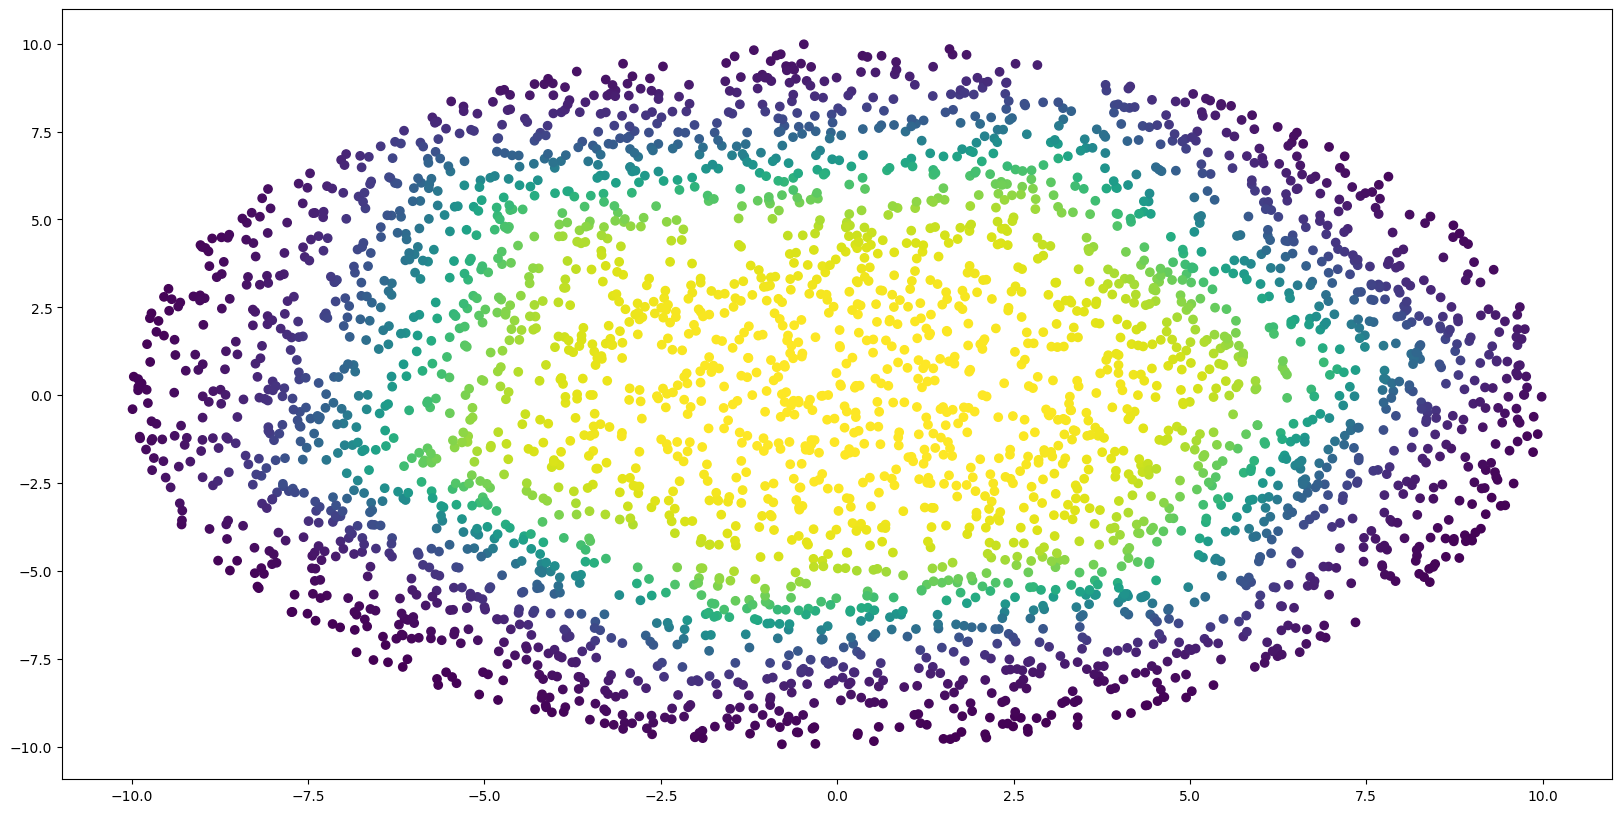

In [43]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=test_scores)
plt.show()

Кажется, с оптимизатором Adam стало лучше, но как будто бы точность нейронки не выше бейзлайна с RandomForest (ну или около того). Я еще пробовала брать 150 и 200 эпох, поняла, что после 100 ошибка и точность скачут туда-сюда, поэтому как будто нет смысла задавать больше 100 эпох